# ISE 447 - Financial Optimization - HW 2

## Jack Dean
## Lehigh University

Due Date: Monday March 21st, 2022  
Total: 100 Points  
*Note*: Under otherwise stated, all textbook references are for “Optimization Methods in Finance”

In [1]:
'''Packages used in this work'''
import numpy as np
import pandas as pd
import pulp
from pulp import *
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

## Problem 1 -- Reformulating Linear Programs & Duality (10 Points)

Consider the modified version of the fund allocation problem considered in HW 1, Question 5.  Recall that a linear program in standard form is
$$\min c^Tx$$
$$\mathrm{s.t.}\; Ax=b$$
$$x \geq 0$$
First reformulate the modified version of the fund allocation problem considered in HW 1, Question 5, in standard form.  Then find the linear programming dual associated to it.

### RECALL: Modified Fund Allocation Problem (as in HQ 1 Solutions)

$$\max 0.10f_1 + 0.15f_2 + 0.16f_3 + 0.08f_4$$
$$\mathrm{s.t.}\;\;\; f_1 + f_2 + f_3 + f_4 + s = 80,000$$
$$0.50f_1 + 0.30f_2 + 0.25f_3 + 0.60f_4 \geq 0.35 * (f_1 + f_2 + f_3 + f_4)$$
$$0.30f_1 + 0.10f_2 + 0.40f_3 + 0.20f_4 \geq 0.30 * (f_1 + f_2 + f_3 + f_4)$$
$$0.20f_1 + 0.60f_2 + 0.35f_3 + 0.20f_4 \geq 0.15 * (f_1 + f_2 + f_3 + f_4)$$
$$s - \alpha0.50f_1 - \alpha0.30f_2 - \alpha0.25f_3 - \alpha0.60f_4 \geq 0$$
$$$$
$$f_1,f_2,f_3,f_4,s \geq 0$$

### Solution

Reformulated Primal

$$\min -0.10f_1 - 0.15f_2 - 0.16f_3 - 0.08f_4$$
$$\mathrm{s.t.}\;\; f_1 + f_2 + f_3 + f_4 + s = 80,000$$
$$0.50f_1 + 0.30f_2 + 0.25f_3 + 0.60f_4 + 0.35s - e_1 = 28000$$
$$0.30f_1 + 0.10f_2 + 0.40f_3 + 0.20f_4 + 0.30s - e_2 = 24000$$
$$0.20f_1 + 0.60f_2 + 0.35f_3 + 0.20f_4 + 0.15s - e_3 = 12000$$
$$\alpha0.50f_1 - \alpha0.30f_2 - \alpha0.25f_3 - \alpha0.60f_4 + s - e_4= 0$$
$$$$
$$f_1,f_2,f_3,f_4,s,e_1,e_2,e_3,e_4 \geq 0$$

Associated Dual
$$\max \; 80000w_1 + 28000w_2 + 24000w_3 + 12000w_4 + 0w_5$$
$$\mathrm{s.t.}\;\; w_1 + 0.50w_2 + 0.30w_3 + 0.20w_4 - \alpha0.50w_5 \leq -0.10$$
$$w_1 + 0.30w_2 + 0.10w_3 + 0.60w_4 - \alpha0.30w_5 \leq -0.15$$
$$w_1 + 0.25w_2 + 0.40w_3 + 0.35w_4 - \alpha0.25w_5 \leq -0.16$$
$$w_1 + 0.60w_2 + 0.20w_3 + 0.20w_4 - \alpha0.60w_5 \leq -0.08$$
$$w_1 + 0.35w_2 + 0.30w_3 + 0.15w_4 + w_5 \leq 0$$
$$w_1\in\mathbb{R} \;\; \mathrm{and} \; w_i\in\mathbb{R}^+\;\;\forall i \in\{2,3,4,5\}$$


## Problem 2 -- Linear Programming Duality (Based on Exercise 2.3 in Textbook) (10 Points)

Consider a Linear Program of the Form:
$$\max c^Tx$$
$$\mathrm{s.t.} \; Ax\leq b$$
$$x \geq 0$$
where
$$A = \begin{pmatrix}
1 & 1 & 1 & 1 & 1\\
5 & 4 & 3 & 2 & 1\\
\end{pmatrix},\;\;\; b = \begin{pmatrix}
3\\
14\\
\end{pmatrix},\;\;\;
c=\begin{pmatrix}
6\\
5\\
4\\
3\\
5
\end{pmatrix}$$
First, obtain the dual of this problem. Now solve the dual problem that you obtain using your favorite solver. Does the objective of the dual LP tells you something about the objective value of the original problem?


*Hint*: notice that the problem is in “dual form”, so in a sense you are really looking for the primal associated to this dual  
*Note*: because it has only two variables, you could also solve the problem by the graphical method

### Solution

$$\min b^Ty$$
$$\mathrm{s.t.} \; A^Ty\geq c$$
$$y\geq 0$$

$$A^T = \begin{pmatrix}
1 & 5 \\
1 & 4 \\
1 & 3 \\
1 & 2 \\
1 & 1
\end{pmatrix}$$

In [2]:
'''
Problem data
'''
dec_vars   = ['y1', 'y2']
opt_coef   = dict(zip(dec_vars, [3, 14]))
cons_one   = dict(zip(dec_vars, [1, 5]))
cons_two   = dict(zip(dec_vars, [1, 4]))
cons_three = dict(zip(dec_vars, [1, 3]))
cons_four  = dict(zip(dec_vars, [1, 2]))
cons_five  = dict(zip(dec_vars, [1, 1]))
y          = LpVariable.dicts('Decision Variable',dec_vars,lowBound=0)

'''
problem formulation
'''
problem    = LpProblem('Dual Problem', LpMinimize)
problem   += lpSum([opt_coef[i] * y[i] for i in dec_vars])
problem   += lpSum([cons_one[i] * y[i] for i in dec_vars]) >= 6
problem   += lpSum([cons_two[i] * y[i] for i in dec_vars]) >= 5
problem   += lpSum([cons_three[i] * y[i] for i in dec_vars]) >= 4
problem   += lpSum([cons_four[i] * y[i] for i in dec_vars]) >= 3
problem   += lpSum([cons_five[i] * y[i] for i in dec_vars]) >= 5

'''
problem solution
'''
problem.solve()
values = [{'name':v.name, 'value':v.varValue} for v in problem.variables()]
print('Decision Variable Values')
md(pd.DataFrame(values).to_markdown())

Decision Variable Values


C:\Users\jdean\AppData\Local\Programs\Python\Python39\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


|    | name                 |   value |
|---:|:---------------------|--------:|
|  0 | Decision_Variable_y1 |    4.75 |
|  1 | Decision_Variable_y2 |    0.25 |

In [3]:
print('The objective of the Dual LP is {:.2f}'.format(value(problem.objective)))
print('This is also the objective of the Primal LP')

The objective of the Dual LP is 17.75
This is also the objective of the Primal LP


## Problem 3 -- Dedication and Immunization portfolios (Based on Excercise 3.1 in the Textbook 3.1) (50 Points)

You need to create a portfolio to cover the following stream of liabilities for the next six future periods:

| Period | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
| Liability | 500 | 200 | 800 | 200 | 800 | 1200 |

For that purpose, you may purchase the bonds in Table 1.

The term structure of risk-free insterest rate is (to be used for Immunization Constraints)

| Period | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
| Rate | 5.04% | 5.94% | 6.36% | 7.18% | 7.89% | 8.39% |

### Part (a) -- Dedication (10 Points)
Formulate a linear programming model to find the lowest-cost long-only (only buy bonds) dedicated portfolio that covers the stream of liabilities with the bonds above. Assume that surplus balances can be carried from one period to the next but earn no interest. What is the cost of your portfolio? What is the composition of your portfolio?

*Table 1*

| Bond | 1 | 2 | 3 | 4 | 5 | 6 | Price |
| -- | -- | -- | -- | -- | -- | -- | -- |
| 1 | 10 | 10 | 10 | 10 | 10 | 110 | 109 |
| 2 | 7 | 7 | 7 | 7 | 7 | 107 | 94.8 |
| 3 | 8 | 8 | 8 | 8 | 8 | 108 | 99.5 |
| 4 | 6 | 6 | 6 | 6 | 106 | 0 | 93.1 |
| 5 | 7 | 7 | 7 | 7 | 107 | 0 | 97.2 |
| 6 | 6 | 6 | 6 | 106 | 0 | 0 | 93.1 |
| 7 | 5 | 5 | 5 | 105 | 0 | 0 | 97.2 |
| 8 | 10 | 10 | 110 | 0 | 0 | 0 | 110 |
| 9 | 8 | 8 | 108 | 0 | 0 | 0 | 104 |
| 10 | 6 | 6 | 106 | 0 | 0 | 0 | 101 |
| 11 | 10 | 110 | 0 | 0 | 0 | 0 | 107 |
| 12 | 7 | 107 | 0 | 0 | 0 | 0 | 102 |
| 13 | 100 | 0 | 0 | 0 | 0 | 0 | 95.2 |

### Part (b) -- Term Structure (5 Points)
Use the linear programming sensitivity information obtained by solving the problem in Part (a) to determine the implied term structure of interest rates

### Part (c) -- Overpriced Bonds (5 Points)
Using sensitivity analysis information, and in particular the reduced costs associated to the different bonds, can you identify bonds that are overpriced? By how much? Briefly explain.

### Part (d) -- Term Structure cont. (5 Points)
Suppose the streams of liabilities changes to

| Period | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
| Liability | 100 | 200 | 800 | 500 | 800 | 1200 |

Find the new optimal dedicated portfolio and determine its associated new implied term structure. Is it different from the one you obtained in Part (b)? Can you provide an intuitive explanation for the difference or lack of thereof?

### Part (e) -- Immunization (25 Points)
Using the problem's original data:

#### Sub-Part (i) -- (10 Points)
Find the lowest cost portfolio that matches the present value and duration of the stream of liabilities.

#### Sub-Part (ii) -- (5 Points)
Compare the costs and the cash flow streams vs liabilities of both the Dedication and Immunized portfolio. Discuss the trade-offs of each solution. Briefly explain which portfolio would you prefer.

#### Sub-Part (iii) -- (10 Points)
How does the present value of the Immunized portfolio change if the current rates decrease (all) by 1 percentage point? How does the present value of the Immunized portfolio change if the current rates increase (all) by 1 percentage point? How does the present value of the Immunized portfolio change if the current rates of periods 1, 2 decrease by 1%, of periods 3, 4, 5 increase by 1%, and of period 6 decreases by 1%. Can you draw any conclusions from your results.


### Solution to Part (a)

In [4]:
'''
PROBLEM DATA
'''

'''Years of Liabilities and Interest Rates'''
cf_yr       = [     0,     1,     2,     3,     4,     5,     6]
liabilities = [     0,   500,   200,   800,   200,   800,  1200]
rates       = [0.0000,0.0504,0.0594,0.0636,0.0718,0.0789,0.0839]

'''
Bonds and their Cash Flows
NOTE: Original bond price IS included as a negative, representing buying the bond
'''
bonds = [ '$b_1$', '$b_2$', '$b_3$', '$b_4$', '$b_5$', '$b_6$', '$b_7$', '$b_8$', '$b_9$','$b_{10}$','$b_{11}$','$b_{12}$','$b_{13}$']
d =     [
        [    -109,   -94.8,   -99.5,   -93.1,   -97.2,   -96.3,   -92.9,   -110 ,   -104 ,     -101 ,     -107 ,     -102 ,     -95.2],
        [      10,       7,       8,       6,       7,       6,       5,      10,       8,         6,        10,         7,       100],
        [      10,       7,       8,       6,       7,       6,       5,      10,       8,         6,       110,       107,         0],
        [      10,       7,       8,       6,       7,       6,       5,     110,     108,       106,         0,         0,         0],
        [      10,       7,       8,       6,       7,     106,     105,       0,       0,         0,         0,         0,         0],
        [      10,       7,       8,     106,     107,       0,       0,       0,       0,         0,         0,         0,         0],
        [     110,     107,     108,       0,       0,       0,       0,       0,       0,         0,         0,         0,         0]
        ]

'''DataFrame to combine all related Cash Flows Data'''
df = pd.DataFrame(data=d,index=cf_yr,columns=bonds)
df['liabilities'] = liabilities
df.index.name = 'year'

'''PV Mechanics, Duration, and Convexity'''
pv_factor = []
for i in range(0,7):
    pv_factor.append(1/(1+rates[i])**i)

dur_factor = []
for i in range(0,7):
    dur_factor.append( i / (1+rates[i]) ** (i+1))

conv_factor = []
for i in range(0,7):
    conv_factor.append( (i * (i+1)) / (1+rates[i]) ** (i+2))

In [5]:
'''
PORTFOLIO ALLOCATION INITIAL SOLVE
'''

'''
Decision Variables
---
bond_count - The amount of each bond purchased  
carry - excess cash from coupon payments carried over period to period  
r - The interest rate on cash carry
'''
bond_count = LpVariable.dicts('Bonds',bonds,lowBound=0)
carry = LpVariable.dicts('CashCarry',df.index[0:],lowBound=0)
r=0


'''
Problem Set Up & Solution
---
portfolio - problem name
'''
portfolio = LpProblem('Dedication', LpMinimize)
portfolio += lpSum([df[i][0] * bond_count[i] * (-1) for i in bonds] + carry[0])
for j in df.index[1:]:
    portfolio += lpSum([df[i][j] * bond_count[i] for i in bonds] + carry[j-1]*(1+r) - carry[j]) >= df.iloc[j,-1]  

portfolio.solve()

bonds_fin = dict(zip([v.name[6:] for v in portfolio.variables()], [v.varValue for v in portfolio.variables()]))

print('The minimized portfolio value is : ${:.2f}'.format(value(portfolio.objective)))


The minimized portfolio value is : $2754.28


In [6]:
'''
Decision Variable Breakdown
'''
final_dec = pd.DataFrame(bonds_fin, index=['count'], columns=bonds).transpose()
final_dec.index.name = 'bond'
final_dec['amt'] = final_dec['count'] * df.loc[0] * (-1)
final_dec['pct'] = final_dec['amt'] / value(portfolio.objective)
print('Decision Variable Final Values')
md(final_dec.to_markdown())

Decision Variable Final Values


| bond     |     count |       amt |        pct |
|:---------|----------:|----------:|-----------:|
| $b_1$    |  0        |    0      | 0          |
| $b_2$    |  0        |    0      | 0          |
| $b_3$    | 11.1111   | 1105.56   | 0.401395   |
| $b_4$    |  0        |    0      | 0          |
| $b_5$    |  6.6459   |  645.981  | 0.234537   |
| $b_6$    |  0.609338 |   58.6792 | 0.0213047  |
| $b_7$    |  0        |    0      | 0          |
| $b_8$    |  0        |    0      | 0          |
| $b_9$    |  6.11976  |  636.455  | 0.231078   |
| $b_{10}$ |  0        |    0      | 0          |
| $b_{11}$ |  0.10887  |   11.6491 | 0.00422946 |
| $b_{12}$ |  0        |    0      | 0          |
| $b_{13}$ |  3.10887  |  295.964  | 0.107456   |

### Solution to Part (b)

In [7]:
'''Get Shadow Prices'''
o = [{'name':name, 'shadow price':c.pi} for name, c in portfolio.constraints.items()]
portfolio_sp = pd.DataFrame(o)
shadow_prices = portfolio_sp['shadow price']

'''Calculate Implied Yield Curve & Add to Shadow Price df'''
implied_rates  = [0]
for i in range(0,6):
    implied_rates.append(1 / (shadow_prices[i] ** (1/(i+1))) -1)
portfolio_sp['implied rate'] = implied_rates[1:]

'''Print for User'''
print('Portfolio Optimization Shadow Prices')
md(portfolio_sp.to_markdown())

Portfolio Optimization Shadow Prices


|    | name   |   shadow price |   implied rate |
|---:|:-------|---------------:|---------------:|
|  0 | _C1    |       0.952    |      0.0504202 |
|  1 | _C2    |       0.886182 |      0.062279  |
|  2 | _C3    |       0.826801 |      0.0654497 |
|  3 | _C4    |       0.757642 |      0.0718498 |
|  4 | _C5    |       0.684501 |      0.0787608 |
|  5 | _C6    |       0.617065 |      0.0837894 |

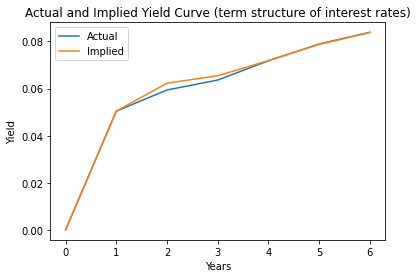

In [8]:
'''Compare Yield Curve'''
plt.plot(rates)
plt.plot(implied_rates)
plt.title('Actual and Implied Yield Curve (term structure of interest rates)')
plt.xlabel('Years')
plt.ylabel('Yield')
plt.legend(['Actual','Implied'])

### Solution to Part (c)

In [9]:
'''
Reduced Cost
---
rc = c - A^Ty  
c is portfolio variable values  
AT is df.transform  
y is shadow prices  
'''

'''Get Inputs'''
c = np.asarray(df.iloc[0,:-1] * (-1))
AT = df.transpose().iloc[:-1,1:].to_numpy()
y = np.asarray(shadow_prices)

'''Calculate & interpret reduced cost'''
reduced_costs = c - np.matmul(AT, y)
final_dec['reduced_cost'] = reduced_costs.round(decimals=3)
final_dec['rich'] = (final_dec['reduced_cost'] > 0)

'''print for user'''
print('Decision Variables Final Value and Reduced Cost')
md(final_dec.to_markdown())

Decision Variables Final Value and Reduced Cost


| bond     |     count |       amt |        pct |   reduced_cost | rich   |
|:---------|----------:|----------:|-----------:|---------------:|:-------|
| $b_1$    |  0        |    0      | 0          |          0.052 | True   |
| $b_2$    |  0        |    0      | 0          |          0.024 | True   |
| $b_3$    | 11.1111   | 1105.56   | 0.401395   |          0     | False  |
| $b_4$    |  0        |    0      | 0          |          0.007 | True   |
| $b_5$    |  6.6459   |  645.981  | 0.234537   |         -0     | False  |
| $b_6$    |  0.609338 |   58.6792 | 0.0213047  |          0     | False  |
| $b_7$    |  0        |    0      | 0          |          0.023 | True   |
| $b_8$    |  0        |    0      | 0          |          0.67  | True   |
| $b_9$    |  6.11976  |  636.455  | 0.231078   |         -0     | False  |
| $b_{10}$ |  0        |    0      | 0          |          2.33  | True   |
| $b_{11}$ |  0.10887  |   11.6491 | 0.00422946 |         -0     | False  |
| $b_{12}$ |  0        |    0      | 0          |          0.515 | True   |
| $b_{13}$ |  3.10887  |  295.964  | 0.107456   |          0     | False  |

### Solution to Part (d)

In [10]:
'''Liability Stream -- ADJUSTED'''
#        Year:     0   1   2   3   4   5    6
liabilities_adj = [0,100,200,800,500,800,1200]

'''DataFrame to combine all related Cash Flows Data -- ADJUSTED'''
df_adj = pd.DataFrame(data=d,index=cf_yr,columns=bonds)
df_adj['liabilities_adj'] = liabilities_adj
df_adj.index.name = 'year'

In [11]:
'''PRIMAL SOLVE'''

'''
Decision Variables
---
bond_count - The amount of each bond purchased  
carry - excess cash from coupon payments carried over period to period  
r - The interest rate on cash carry
'''
bond_count = LpVariable.dicts('Bonds',bonds,lowBound=0)
carry = LpVariable.dicts('CashCarry',df.index[0:],lowBound=0)
r=0

'''
Problem Set Up & Solution
---
adj_portfolio - problem name
'''
adj_portfolio = LpProblem('Dedication', LpMinimize)
adj_portfolio += lpSum([df_adj[i][0] * bond_count[i] * (-1) for i in bonds] + carry[0])
for j in df.index[1:]:
    adj_portfolio += lpSum([df_adj[i][j] * bond_count[i] for i in bonds] + carry[j-1]*(1+r) - carry[j]) == df_adj.iloc[j,-1]  

adj_portfolio.solve()

bonds_fin = dict(zip([v.name[6:] for v in adj_portfolio.variables()], [v.varValue for v in adj_portfolio.variables()]))

print('The minimized portfolio value is : ${:.2f}'.format(value(adj_portfolio.objective)))

The minimized portfolio value is : $2610.35


In [12]:
final_dec = pd.DataFrame(bonds_fin, index=['count'], columns=bonds).transpose()
final_dec.index.name = 'bond'
final_dec['amt'] = final_dec['count'] * df.loc[0] * (-1)
final_dec['pct'] = final_dec['amt'] / value(adj_portfolio.objective)
print('Decision Variable Breakdown')
md(final_dec.to_markdown())

Decision Variable Breakdown


| bond     |    count |      amt |      pct |
|:---------|---------:|---------:|---------:|
| $b_1$    |  0       |    0     | 0        |
| $b_2$    | 11.215   | 1063.18  | 0.407294 |
| $b_3$    |  0       |    0     | 0        |
| $b_4$    |  6.80656 |  633.691 | 0.242761 |
| $b_5$    |  0       |    0     | 0        |
| $b_6$    |  0       |    0     | 0        |
| $b_7$    |  3.62529 |  336.79  | 0.129021 |
| $b_8$    |  0       |    0     | 0        |
| $b_9$    |  5.54507 |  576.687 | 0.220924 |
| $b_{10}$ |  0       |    0     | 0        |
| $b_{11}$ |  0       |    0     | 0        |
| $b_{12}$ |  0       |    0     | 0        |
| $b_{13}$ |  0       |    0     | 0        |

In [13]:
'''Get Shadow Prices'''
o = [{'name':name, 'shadow price':c.pi} for name, c in adj_portfolio.constraints.items()]
adj_portfolio_sp = pd.DataFrame(o)
shadow_prices = adj_portfolio_sp['shadow price']

'''Calculate Implied Yield Curve & Add to Shadow Price df'''
implied_rates  = [0]
for i in range(0,6):
    implied_rates.append(1 / (shadow_prices[i] ** (1/(i+1))) -1)
adj_portfolio_sp['implied rate'] = implied_rates[1:]

'''print for user'''
print('Adjusted Portfolio Shadow Prices')
md(adj_portfolio_sp.to_markdown())

Adjusted Portfolio Shadow Prices


|    | name   |   shadow price |   implied rate |
|---:|:-------|---------------:|---------------:|
|  0 | _C1    |       0.83871  |      0.192308  |
|  1 | _C2    |       0.83871  |      0.0919284 |
|  2 | _C3    |       0.83871  |      0.0603831 |
|  3 | _C4    |       0.764946 |      0.069282  |
|  4 | _C5    |       0.692581 |      0.0762321 |
|  5 | _C6    |       0.626023 |      0.0811891 |

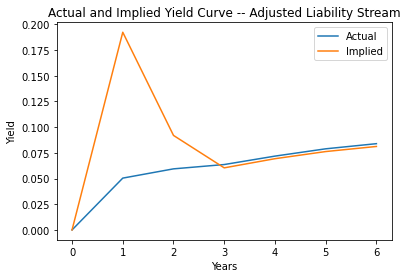

In [14]:
'''Compare Yield Curve'''
plt.plot(rates)
plt.plot(implied_rates)
plt.title('Actual and Implied Yield Curve -- Adjusted Liability Stream')
plt.xlabel('Years')
plt.ylabel('Yield')
plt.legend(['Actual','Implied'])

The term structure is extremely different between the two cases.  This is because the first case requires no cash carry, while the second does.  Because this doesn't earn any interest, the same allocation of bonds is required later in the problem, which means the excessive cash at the beginning spikes the term structure.

### Solution to Part (e)

#### Solution to Sub Part (i)

In [15]:
'''Immunization Facts'''

npv = np.matmul(df.iloc[:,-1].to_numpy(),np.asarray(pv_factor))
print('The NPV of the liabilities is ${:.2f}'.format(npv))

dur = np.matmul(df.iloc[:,-1].to_numpy(),np.asarray(dur_factor) )
print('The duration of the liabilites are {:.2f} years'.format(dur/npv))

conv = np.matmul(df.iloc[:,-1].to_numpy(),np.asarray(conv_factor))
print('The convexity of the liabilities are {:.2f}'.format(conv/npv))

The NPV of the liabilities is $2757.94
The duration of the liabilites are 3.58 years
The convexity of the liabilities are 18.88


In [16]:
'''PRIMAL SOLVE -- Immunization'''

'''
Decision Variables
---
immune_bond_count - Bonds Bought  
NOTE: No Cash Carry because no dedication required
'''
immune_bond_count = LpVariable.dicts('Bonds',bonds,lowBound=0)

'''
Problem Formulation & Solution
---
immune_portfolio - problem name
'''
immune_portfolio = LpProblem('Immunization', LpMinimize)
immune_portfolio += lpSum([df[i][0] * immune_bond_count[i] * (-1) for i in bonds])
immune_portfolio += lpSum([df[i][1:] * pv_factor[1:] * immune_bond_count[i] for i in bonds]) == npv
immune_portfolio += lpSum([df[i][1:] * dur_factor[1:] * immune_bond_count[i] for i in bonds]) == dur
'''
Convexity Constraint
---
NOTE: If convexity is also needed, this is the necessary constraint.  This is not run in the current iteration
immune_portfolio += lpSum([df[i][1:] * conv_factor[1:] * immune_bond_count[i] for i in bonds]) == conv
'''

immune_portfolio.solve()

bonds_fin = dict(zip([v.name[6:] for v in immune_portfolio.variables()], [v.varValue for v in immune_portfolio.variables()]))

print('The minimized portfolio value is : ${:.2f}'.format(value(immune_portfolio.objective)))

The minimized portfolio value is : $2750.69


In [17]:
final_dec = pd.DataFrame(bonds_fin, index=['count'], columns=bonds).transpose()
final_dec.index.name = 'bond'
final_dec['amt'] = final_dec['count'] * df.loc[0] * (-1)
final_dec['pct'] = final_dec['amt'] / value(immune_portfolio.objective)
print('Decision Variable Breakdown -- Immunized Portfolio')

md(final_dec.to_markdown())

Decision Variable Breakdown -- Immunized Portfolio


| bond     |   count |     amt |      pct |
|:---------|--------:|--------:|---------:|
| $b_1$    |  0      |    0    | 0        |
| $b_2$    |  0      |    0    | 0        |
| $b_3$    | 13.4945 | 1342.7  | 0.488132 |
| $b_4$    |  0      |    0    | 0        |
| $b_5$    |  0      |    0    | 0        |
| $b_6$    |  0      |    0    | 0        |
| $b_7$    |  0      |    0    | 0        |
| $b_8$    |  0      |    0    | 0        |
| $b_9$    | 13.5384 | 1407.99 | 0.511868 |
| $b_{10}$ |  0      |    0    | 0        |
| $b_{11}$ |  0      |    0    | 0        |
| $b_{12}$ |  0      |    0    | 0        |
| $b_{13}$ |  0      |    0    | 0        |

#### Solution to Sub Part (ii)

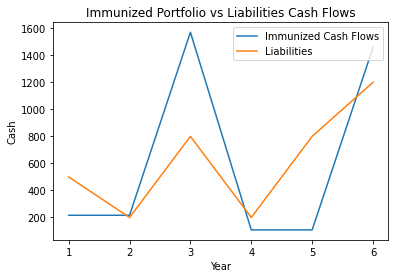

In [18]:
plt.plot((final_dec['count'] * df[1:]).transpose().sum())
plt.plot(df['liabilities'][1:])
plt.title('Immunized Portfolio vs Liabilities Cash Flows')
plt.xlabel('Year')
plt.ylabel('Cash')
plt.legend(['Immunized Cash Flows', 'Liabilities'])

Obviously, the orange line representing the liabilities also represents cashflows from the dedicted portfolio.  The immunized portfolio sees most of its cash come in in period 3 and 6, which happens to have large liabilities then.  That said, the immunized portfolio will not cover the year one liability, which is a cause for concern.  This is because there is little time to refinance ahead of this liability being due.  Additionally, the immunized portfolio cost is only 4 dollars less than the dedicated portfolio.  This is such a small difference relative to the value of both portfolios that I would suggest the dedicated portfolio in this case.

#### Solution to Sub Part (iii)

**RECALL**: The duration of the liabilities (and therefore the immunized portfolio) is 3.58 years

*1 pt decrease*  
A 1% decrease implies the present value should increase by 3.58

*1 pt increase*  
A 1% increase implies the present value should decrease by 3.58

*Crazy Shift*  
A duration approximation of this value is invalid as the shift is not constant throughout the curve.   That said, it should slightly increase as the largest liability will have a greater discount factor (year 6 rate decreases by 1%)

## Problem 4 -- Dedication with Bond Ratings (Based on Exercise 3.1 in the Textbook) (10 Points)
Consider basically the same instance of the Dedication portfolio considered in the previous question. However, now the prices of the bonds are a bit different, and for each bond, we are giving his risk rating (think of Moody’s or Bloomberg ratings).

| Bond | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| Price | 108 | 94 | 99 | 92.7 | 96.6 | 95.9 | 92.9 | 100 | 104 | 101 | 107 | 102 | 95.2 |
| Rating | B | B | B | B | B | B | A | A | A | A | A | A | A |

Solve the Dedication portfolio problem of the previous question with the new prices, but this time assume that at most 50% of the money that you invest in Bonds should be allocated to “B” rated Bonds. What is the cost of your portfolio? What is the composition of your portfolio.

### Solution

In [19]:
'''Problem Data'''

'''Liability Stream'''
#        Year: 0   1   2   3   4   5   6
liabilities = ['',0,500,200,800,200,800,1200]

'''Year of Cashflows Index'''
cf_yr = ['rating',0,1,2,3,4,5,6]

'''Bond Options'''
bonds = ['b1','b2','b3','b4','b5','b6','b7','b8','b9','b10','b11','b12','b13']

'''
Bond Cash Flows
NOTE: Original bond price IS included as a negative, representing buying the bond
'''
d = [
    ['B'  ,'B'  ,'B'  ,'B'  ,'B'  ,'B'  ,'A'  ,'A'  ,'A'  ,'A'  ,'A'  ,'A'  ,'A'  ],
    [-108 ,-94  ,-99  ,-92.7,-96.6,-95.9,-92.9,-100 ,-104 ,-101 ,-107 ,-102 ,-95.2],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,10   ,8    ,6    ,10   ,7    ,100  ],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,10   ,8    ,6    ,110  ,107  ,0    ],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,110  ,108  ,106  ,0    ,0    ,0    ],
    [10   ,7    ,8    ,6    ,7    ,106  ,105  ,0    ,0    ,0    ,0    ,0    ,0    ],
    [10   ,7    ,8    ,106  ,107  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ],
    [110  ,107  ,108  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ]
    ]

'''DataFrame to combine all related Cash Flows Data'''
rating_df = pd.DataFrame(data=d,index=cf_yr,columns=bonds)
rating_df['liabilities'] = liabilities
rating_df.index.name = 'year'

'''Interest Rate and Present Value Mechanics'''
#  Year:      0      1      2      3      4      5      6
rates = [0,0.0000,0.0504,0.0594,0.0636,0.0718,0.0789,0.0839]
pv_factor = [1]
for i in range(1,7):
    pv_factor.append(1/(1+rates[i])**i)

In [20]:
'''PRIMAL SOLVE'''

'''
Decision Variables
---
bond_count - The amount of each bond purchased  
b_bons - bonds with a 'B' Rating  
carry - excess cash from coupon payments carried over period to period  
r - The interest rate on cash carry
'''
bond_count = LpVariable.dicts('Bonds',bonds,lowBound=0)
carry = LpVariable.dicts('CashCarry',rating_df.index[1:],lowBound=0)
b_bonds = rating_df.columns[(rating_df.loc['rating']=='B')].to_list()
r=0

'''
Problem Set Up & Solution
---
rating_portfolio - problem name
'''
rating_portfolio = LpProblem('Dedication', LpMinimize)
rating_portfolio += lpSum([rating_df[i][0] * bond_count[i] * (-1) for i in bonds] + carry[0])
rating_portfolio += 0.5 * lpSum([rating_df[i][0] * bond_count[i] * (-1) for i in bonds]) - lpSum([rating_df[i][0] * bond_count[i] * (-1) for i in b_bonds]) >= 0
for j in rating_df.index[2:]:
    rating_portfolio += lpSum([rating_df[i][j] * bond_count[i] for i in bonds] + carry[j-1]*(1+r) - carry[j]) == rating_df['liabilities'][j]  

rating_portfolio.solve()

bonds_fin = dict(zip([v.name[6:] for v in rating_portfolio.variables()], [v.varValue for v in rating_portfolio.variables()]))

print('The minimized portfolio value is : ${:.2f}'.format(value(rating_portfolio.objective)))


The minimized portfolio value is : $2705.73


In [21]:
final_dec = pd.DataFrame(bonds_fin, index=['count'], columns=bonds).transpose()
final_dec.index.name = 'bond'
final_dec['amt'] = final_dec['count'] * rating_df.loc[0] * (-1)
final_dec['pct'] = final_dec['amt'] / value(rating_portfolio.objective)
final_dec['rating'] = rating_df.loc['rating']
print('Decision Variable Breakdown -- Bond Rating Portfolio')

md(final_dec.to_markdown())

Decision Variable Breakdown -- Bond Rating Portfolio


| bond   |    count |     amt |      pct | rating   |
|:-------|---------:|--------:|---------:|:---------|
| b1     |  0       |    0    | 0        | B        |
| b2     | 11.215   | 1054.21 | 0.389619 | B        |
| b3     |  0       |    0    | 0        | B        |
| b4     |  3.22179 |  298.66 | 0.110381 | B        |
| b5     |  0       |    0    | 0        | B        |
| b6     |  0       |    0    | 0        | B        |
| b7     |  0       |    0    | 0        | A        |
| b8     | 10.7207  | 1072.07 | 0.39622  | A        |
| b9     |  0       |    0    | 0        | A        |
| b10    |  0       |    0    | 0        | A        |
| b11    |  0       |    0    | 0        | A        |
| b12    |  0       |    0    | 0        | A        |
| b13    |  2.94958 |  280.8  | 0.10378  | A        |

## Problem 5 -- Other Liability Management Problem (Based on Exercise 3.4/3.5 in the Textbook) (10 Points)
A company will face the following cash requirement in the next eight quarters (positive numbers indicate cash needs while negative entries represent cash surpluses):

| Period | Q1 | Q2 | Q3 | Q4 | Q5 | Q6 | Q7 | Q8 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- |
| Liability/Surplus | 100 | 500 | 100 | -600 | -500 | 200 | 600 | -900 |

To cover cash needs, the company has three borrowing possibilities:  
* A 2-year loan available at the beginning of Q1, with a 1% interest rate per quarter  
* The other two borrowing opportunities are available at the beginning of every quarter: a 6-month loan with 1.8% interest rate per quarter, and a quarterly loan with 2.5% interest per quarter  
* Any surplus can be invested at a 0.5% interest rate per quarter

### Part (a) -- (5 Points)
Formulate a linear program that maximizes the wealth of the company at the beginning of Q9

### Part (b) -- (5 Points)
Using your favorite solver, solve the liability management problem above, and find out the dual values associated to each of the balance per quarter constraints. Use the latter information to solve the following question: Supose that the cash requirement in Q2 is 300 (instead of 500). Use the shadow price associated to the Q2 balance constraint to find out by how much would the wealth in Q9 would change.


### Solution to Part (a)

$$\max 1.005z_8$$
$$\mathrm{s.t.} w + x_1 + y_1 -z_1 = 100$$
$$-.01w -1.018x_1 -0.018x_2 + x_3 - 1.025y_2 + y_3 + 1.005z_2- z_3 = 100$$
$$-.01w -1.018x_2 -0.018x_3 + x_4 - 1.025y_3 + y_4 + 1.005z_3- z_4 = -600$$
$$-.01w -1.018x_3 -0.018x_4 + x_5 - 1.025y_4 + y_5 + 1.005z_4- z_5 = -500$$
$$-.01w -1.018x_4 -0.018x_5 + x_6 - 1.025y_5 + y_6 + 1.005z_5- z_6 = 200$$
$$-.01w -1.018x_5 -0.018x_6 - 1.025y_6 + y_7 + 1.005z_6- z_7 = 600$$
$$-1.01w -1.018x_6 - 1.025y_7  + 1.005z_7- z_8= -900$$
$$w,x_i,y_i,z_i\geq0\;\forall i$$

### Solution to Part (b)

In [22]:
'''
Interest Rates for Respective Loans and Cash (given values)
---
tl_r - Term Loan Interest Rate (1.00%/q)  
q2_r - 2 Quarter Loan Interest Rate (1.8%/q)  
q1_r - 1 Quarter Loan Interest Rate (2.5%/q)  
ec_r - Excess Cash Interest Rate (0.5%/q)
'''
tl_r = 0.010
q2_r = 0.018
q1_r = 0.025
ec_r = 0.005

'''
Problem Data
---
loans - names for each loan as a decision variable  
obj - objective function coefficients  
data - Balance of Cash through Time per Decision Variable  
eqs - Quarters & Objective (for df)  
quar - quarters (for solve)
cfs - Cash Flow Needs  
df - Compiled Data
'''
loans=  [  '$w$','$x_1$','$x_2$','$x_3$','$x_4$','$x_5$','$x_6$','$y_1$','$y_2$','$y_3$','$y_4$','$y_5$','$y_6$','$y_7$','$z_1$','$z_2$','$z_3$','$z_4$','$z_5$','$z_6$','$z_7$','$z_8$']
obj  =  [      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      1]
data =  [
        [      1,      1,      0,      0,      0,      0,      0,      1,      0,      0,      0,      0,      0,      0,     -1,      0,      0,      0,      0,      0,      0,      0],
        [ 0-tl_r, 0-q2_r,      1,      0,      0,      0,      0,-1-q1_r,      1,      0,      0,      0,      0,      0, 1+ec_r,     -1,      0,      0,      0,      0,      0,      0],
        [ 0-tl_r,-1-q2_r, 0-q2_r,      1,      0,      0,      0,      0,-1-q1_r,      1,      0,      0,      0,      0,      0, 1+ec_r,     -1,      0,      0,      0,      0,      0],
        [ 0-tl_r,      0,-1-q2_r, 0-q2_r,      1,      0,      0,      0,      0,-1-q1_r,      1,      0,      0,      0,      0,      0, 1+ec_r,     -1,      0,      0,      0,      0],
        [ 0-tl_r,      0,      0,-1-q2_r, 0-q2_r,      1,      0,      0,      0,      0,-1-q1_r,      1,      0,      0,      0,      0,      0, 1+ec_r,     -1,      0,      0,      0],
        [ 0-tl_r,      0,      0,      0,-1-q2_r, 0-q2_r,      1,      0,      0,      0,      0,-1-q1_r,      1,      0,      0,      0,      0,      0, 1+ec_r,     -1,      0,      0],
        [ 0-tl_r,      0,      0,      0,      0,-1-q2_r, 0-q2_r,      0,      0,      0,      0,      0,-1-q1_r,      1,      0,      0,      0,      0,      0, 1+ec_r,     -1,      0],
        [-1-tl_r,      0,      0,      0,      0,      0,-1-q2_r,      0,      0,      0,      0,      0,      0,-1-q1_r,      0,      0,      0,      0,      0,      0, 1+ec_r,     -1],
        [      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0, 1+ec_r]
        ]

eqs  = ['q1','q2','q3','q4','q5','q6','q7','q8','obj']
cfs  = [ 100, 500, 100,-600,-500, 200, 600,-900,    0]
quar = ['q1','q2','q3','q4','q5','q6','q7','q8']

df= pd.DataFrame(data=data,columns=loans,index=eqs)
df['cash_reqs'] = cfs

md(df.transpose().to_markdown())

|           |   q1 |      q2 |      q3 |       q4 |       q5 |      q6 |      q7 |       q8 |   obj |
|:----------|-----:|--------:|--------:|---------:|---------:|--------:|--------:|---------:|------:|
| $w$       |    1 |  -0.01  |  -0.01  |   -0.01  |   -0.01  |  -0.01  |  -0.01  |   -1.01  | 0     |
| $x_1$     |    1 |  -0.018 |  -1.018 |    0     |    0     |   0     |   0     |    0     | 0     |
| $x_2$     |    0 |   1     |  -0.018 |   -1.018 |    0     |   0     |   0     |    0     | 0     |
| $x_3$     |    0 |   0     |   1     |   -0.018 |   -1.018 |   0     |   0     |    0     | 0     |
| $x_4$     |    0 |   0     |   0     |    1     |   -0.018 |  -1.018 |   0     |    0     | 0     |
| $x_5$     |    0 |   0     |   0     |    0     |    1     |  -0.018 |  -1.018 |    0     | 0     |
| $x_6$     |    0 |   0     |   0     |    0     |    0     |   1     |  -0.018 |   -1.018 | 0     |
| $y_1$     |    1 |  -1.025 |   0     |    0     |    0     |   0     |   0     |    0     | 0     |
| $y_2$     |    0 |   1     |  -1.025 |    0     |    0     |   0     |   0     |    0     | 0     |
| $y_3$     |    0 |   0     |   1     |   -1.025 |    0     |   0     |   0     |    0     | 0     |
| $y_4$     |    0 |   0     |   0     |    1     |   -1.025 |   0     |   0     |    0     | 0     |
| $y_5$     |    0 |   0     |   0     |    0     |    1     |  -1.025 |   0     |    0     | 0     |
| $y_6$     |    0 |   0     |   0     |    0     |    0     |   1     |  -1.025 |    0     | 0     |
| $y_7$     |    0 |   0     |   0     |    0     |    0     |   0     |   1     |   -1.025 | 0     |
| $z_1$     |   -1 |   1.005 |   0     |    0     |    0     |   0     |   0     |    0     | 0     |
| $z_2$     |    0 |  -1     |   1.005 |    0     |    0     |   0     |   0     |    0     | 0     |
| $z_3$     |    0 |   0     |  -1     |    1.005 |    0     |   0     |   0     |    0     | 0     |
| $z_4$     |    0 |   0     |   0     |   -1     |    1.005 |   0     |   0     |    0     | 0     |
| $z_5$     |    0 |   0     |   0     |    0     |   -1     |   1.005 |   0     |    0     | 0     |
| $z_6$     |    0 |   0     |   0     |    0     |    0     |  -1     |   1.005 |    0     | 0     |
| $z_7$     |    0 |   0     |   0     |    0     |    0     |   0     |  -1     |    1.005 | 0     |
| $z_8$     |    0 |   0     |   0     |    0     |    0     |   0     |   0     |   -1     | 1.005 |
| cash_reqs |  100 | 500     | 100     | -600     | -500     | 200     | 600     | -900     | 0     |

In [23]:
'''PRIMAL SOLVE'''

'''
Decision Variables
---
dec_vars - Amount Taken on Each Loan
'''
dec_vars = LpVariable.dict('loans',loans,lowBound=0)

'''
Problem Set Up & Solution
---
financing - problem name
'''
financing = LpProblem('financing',LpMaximize)
financing += lpSum([df.loc['obj'][i] * dec_vars[i] for i in loans])
for quarter in quar:
    financing += lpSum([df.loc[quarter][i] * dec_vars[i] for i in loans]) == df.loc[quarter][-1]
financing.solve()

'''print for user'''
solutions = [v.varValue for v in financing.variables()]
solution_df = pd.DataFrame([solutions],index=['Value'],columns=loans)
md(solution_df.transpose().to_markdown())

|       |   Value |
|:------|--------:|
| $w$   | 424.41  |
| $x_1$ |   0     |
| $x_2$ | 178.212 |
| $x_3$ |   0     |
| $x_4$ |   0     |
| $x_5$ |   0     |
| $x_6$ |   0     |
| $y_1$ |   0     |
| $y_2$ |   0     |
| $y_3$ | 107.452 |
| $y_4$ |   0     |
| $y_5$ |   0     |
| $y_6$ |   0     |
| $y_7$ |   0     |
| $z_1$ | 324.41  |
| $z_2$ |   0     |
| $z_3$ |   0     |
| $z_4$ | 304.198 |
| $z_5$ | 801.475 |
| $z_6$ | 601.238 |
| $z_7$ |   0     |
| $z_8$ | 471.346 |

In [24]:
'''Get Shadow Prices'''
o = [{'name':name, 'shadow price':c.pi} for name, c in financing.constraints.items()]
sp_financing = pd.DataFrame(o)
md(sp_financing.to_markdown())

|    | name   |   shadow price |
|---:|:-------|---------------:|
|  0 | _C1    |       -1.07744 |
|  1 | _C2    |       -1.07208 |
|  2 | _C3    |       -1.06024 |
|  3 | _C4    |       -1.03438 |
|  4 | _C5    |       -1.02923 |
|  5 | _C6    |       -1.02411 |
|  6 | _C7    |       -1.01902 |
|  7 | _C8    |       -1.005   |

In [25]:
'''Print Objective'''
obj_diff = sp_financing['shadow price'][1] * (300 - 500)
print('The objective changes by ${:.2f}'.format(obj_diff))

The objective changes by $214.42


## Problem 6 -- Home Financing Problem (Based on Exercise 3.6 in the Textbook) (10 Points)
A home buyer can combine several mortgage loans to finance the purchase of a house. Regulations impose limits on the amount that can be borrowed from certain sources as well as a limit on the total reimbursement each
month. Let $B$ be the borrowing needs at $T$ the number of months over which the loans will be paid back. There are $n$ different loan opportunities available. Loan $i$ has a fixed interest rate $t_i$, and length $T_i ≤ T$ and a maximum amount borrowed $b_i$. The monthly payment $m_i$ is required each month. Furthermore,
we would like the total monthly payment $p$ over all loans to be constant. Formulate a linear program that
finds a combination of the loans that minimizes the home buyer’s cost of borrowing.

*Hint*: In addition to variables $x_{t_i}$ for the the payment of loan $i$ in month $t$, it may be useful to introduce a variable for the amount of outstanding principal on loan $i$ in month $t$.


### Solution

$$\min \sum_t \sum_i L_{t_i}$$
$$\mathrm{s.t.} \;\; \sum_i X_{t_i} \geq m_{t_i} \;\;\; \forall t \;\; \mathrm{where} \; m_{t_i}\in\mathbb{R}^+ \; \forall t$$
$$\sum_i X_{t_i} = P \;\;\; \forall t \;\; \mathrm{where} \; P\in\mathbb{R}^+$$
$$L_{t_{i-1}}(1+r_i) - X_{t_i} = L_{t_i} \;\;\; \forall i \; \forall t$$
$$\sum_i L_{t_i} \geq B_t \; \forall t\;\; \mathrm{where} \; B_t\in\mathbb{R}^+ \; \forall t$$
$$L_i \geq0 \; \forall i, \;\; X_{t_i}\geq0 \; \forall i \; \forall t \;\; \mathrm{where}\;i\in\{1,\dots,n\}\;\; t\in\{0,\dots,T\}$$